In [3]:
# DS
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GDS
import geopandas as gpd
import contextily as ctx
from shapely import wkt

# network
import networkx as nx
import powerlaw

from my_utils import *

## Load data

In [13]:
df_tf_odRegion = pd.read_csv(f"result/df_tf_odRegion_{VERSION}.csv")
gdf_zoning = read_csv_to_gdf(f"result/gdf_zoning_{VERSION}.csv").to_crs("epsg:2263")

# Flow Pattern

## Weekday/Weekend

In [28]:
# https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average
df_tf_weekday = (df_tf_odRegion[df_tf_odRegion["weekend"]==0].groupby(["zone_c_od","hour","dayofmonth"],as_index=False)["pasg"].sum()) \
                .groupby(["zone_c_od","hour"],as_index=False)['pasg'].mean()


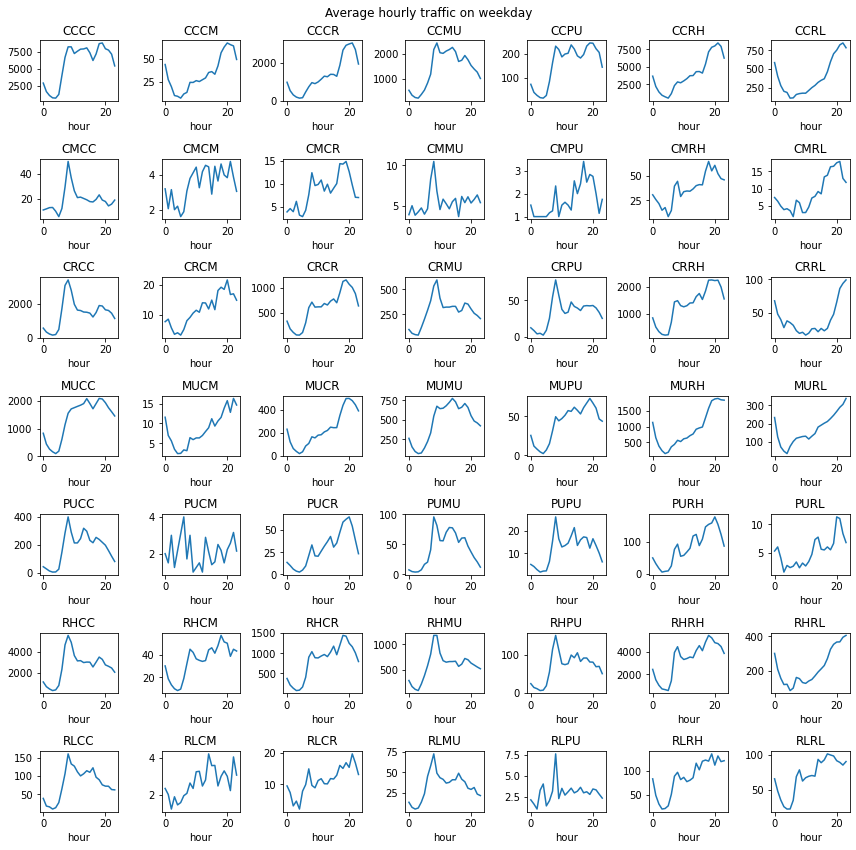

In [35]:
grouped = df_tf_weekday.groupby('zone_c_od')

fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(12,12))

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).plot(x="hour",y="flow_count",ax=ax,title=key,legend=False)

fig.suptitle("Average hourly traffic on weekday")
plt.tight_layout()

## Correlation with Land Use

* 每个区域24h流入流出量
* 对特征进行聚类计算区域的label
* 相关性

In [36]:
df_tf_odRegion

,Origin_ID,Destiny_ID,dayofmonth,hour,weekend,pasg,zone_c_origin,zone_c_desitny,zone_c_od
0,1503,4883,25,17,0,2,RH,CC,RHCC
1,1503,4883,6,20,1,3,RH,CC,RHCC
2,1503,4883,14,20,1,5,RH,CC,RHCC
3,4933,4883,19,20,0,1,CC,CC,CCCC
4,4933,4883,19,21,0,2,CC,CC,CCCC
...,...,...,...,...,...,...,...,...,...
12637243,2853,2853,13,19,1,1,PU,PU,PUPU
12637244,2853,2853,13,19,1,1,PU,PU,PUPU
12637245,39,55,17,14,0,4,RL,CC,RLCC
12637246,8,5,18,14,0,1,RL,MU,RLMU
